## СКРИПТЫ

### ✍ Как уже говорилось, скриптом принято называть небольшую компьютерную программу, которая автоматизирует выполнение некоторой задачи. Программы, которые мы создаём на языке Python, также являются скриптами.

## Скрипт можно использовать разными способами:

* ### Если вам нужно выполнить код один раз или выполнять его очень редко (от случая к случаю), вы можете запустить скрипт вручную из командной строки.
* ### Если вы, например, написали на Python серверную часть веб-сайта и хотите, чтобы ваш код мог в любое время обрабатывать запросы, вы захотите запустить его как фоновый процесс.

### А что делать, если вам нужно, чтобы ваш скрипт запускался иногда? Каждую пятницу, 13-го? В день рождения супруга (или супруги)? Или просто каждый час?

### В этом случае вам нужен автоматический запуск скриптов, или, как часто его называют программисты, запуск по крону — от английского акронима Cron (англ. Command Run ON) — названия системы для автоматического запуска программ и скриптов на сервере в определённое время.

### Автоматический запуск может понадобиться, например:

* если вы хотите с определённой периодичностью скачивать новую информацию с сайтов, например выполнять парсинг новостей для последующего анализа (как мы уже знаем, этот процесс называется web-scraping);
* если ваш скрипт должен следить за курсом акций и каждую минуту делать запрос по API, чтобы получить новые котировки;
* если вы написали обучающую платформу и вам нужно каждый час проверять, кто из студентов приступил к занятиям и насколько успешно продвигается их обучение;
* если у вас есть 500 вендинговых автоматов по продаже солнечных очков и каждые пять минут вы должны опрашивать все автоматы, чтобы узнать, не закончились ли очки.

### Примеров может быть очень много. В каждом, даже небольшом, проекте обычно есть 5-10 скриптов, которые с определённой периодичностью обновляют сертификаты доменов, очищают место на диске, считают статистику, генерируют отчёты и так далее. Давайте научимся настраивать запуск этих скриптов в соответствии с задачами, которые стоят перед вами.

## КАК НАСТРОИТЬ АВТОМАТИЧЕСКИЙ ЗАПУСК

### Во всех операционных системах есть встроенные средства запуска программ по расписанию. Однако можно задать расписание запуска необходимых вам функций на языке Python внутри скрипта.

### Исполняемый по расписанию код часто называют задачей (англ. task). Для планирования задач в Python есть несколько библиотек, среди которых — популярный и простой в использовании модуль schedule (c англ. расписание). Он позволяет запускать код как с определённым интервалом, так и в заданное время.

### Модуль schedule не входит в стандартную библиотеку Python, поэтому его необходимо установить:

In [1]:
# Устанавливаем библиотеку schedule
!pip install schedule 

### Для того чтобы у нас появилась возможность использовать модуль в коде, импортируем его:

In [1]:
import schedule # Импортируем модуль schedule

## ПОСТАНОВКА ЗАДАЧИ

### Рассмотрим вариант автоматического запуска простой функции, которая выводит на экран короткое сообщение:

In [2]:
def task(): 
    print('Hello! I am a task!') 
    return 

### Предположим, что мы хотим, чтобы функция запускалась через определённые интервалы времени, а именно каждые 15 минут.

### Для запуска задачи через определённые интервалы времени в модуле schedule используется метод every(), который получает в качестве единственного аргумента число, указывающее, как часто следует запускать код.

### Далее вызывается метод, определяющий единицы измерения промежутков времени, через которые будет выполняться функция. В нашем примере это минуты. Вот как будет выглядеть итоговый код:

In [4]:
schedule.every(15).minutes.do(task)

Every 15 minutes do task() (last run: [never], next run: 2023-06-01 22:12:34)

### Если бы мы хотели запускать задачу, например, каждый час, то могли бы написать:

In [5]:
schedule.every(1).hour.do(task) 

Every 1 hour do task() (last run: [never], next run: 2023-06-01 22:57:54)

## ВЫПОЛНЕНИЕ ФУНКЦИИ

### После того как мы создали нашу функцию и определились со временем её запуска, мы можем запустить наш менеджер расписания (schedule). Для этого надо создать бесконечный цикл. Да-да, именно так, ведь скрипт должен выполняться постоянно, чтобы постоянно проверять, не пришло ли время снова выполнить задачу.

### Внутри цикла мы будем вызывать особый метод run_pending() для объекта schedule, который будет проверять, нет ли задачи, которую пора выполнить.

### После вызова метода run_pending() нужно будет сделать небольшую паузу, после которой можно будет снова проверять, не пришло ли время для выполнения какой-либо функции.

### Давайте напишем этот код.

### Для создания паузы мы будем использовать метод sleep из модуля time, поэтому наш код начнётся с импорта данного модуля:

In [6]:
import time 
while True: 
    schedule.run_pending() 
    time.sleep(1)

KeyboardInterrupt: 

### Всё готово — теперь можно сохранить файл и выполнить код.

### Вот какой код в итоге получился:

In [3]:
import schedule

def task(): 
    print('Hello! I am a task!') 
    return

schedule.every(15).minutes.do(task)

import time 
while True: 
    schedule.run_pending() 
    time.sleep(1)

KeyboardInterrupt: 

### Этот код будет каждую секунду проверять, не надо ли выполнить какую-то задачу, и раз в 15 минут будет выводить на экран фразу: "Hello! I am a task!" Вывод сообщения будет повторяться до тех пор, пока вы не остановите выполнение скрипта.

In [4]:
a = [1, 2, 3]
b = a
print(a == b, a is b)

True True


In [11]:
one = [1, "2", 3, "4"]
two = ("a", "b", "c", "d")
one.append(5)

one.extend(two)


three = two + ("f", 'g')
print(one, two, three)

[1, '2', 3, '4', 5, 'a', 'b', 'c', 'd'] ('a', 'b', 'c', 'd') ('a', 'b', 'c', 'd', 'f', 'g')


In [18]:
my_lst = [1, 2, 3]
my_lst.sort()
print(my_lst)

[1, 2, 3]


In [24]:
config = {
    "server": {
        "host": "127.0.0.1",
        "port": "22"
    },
    "configuration": {
        "ssh": {
            "access": True,
            "login": "some",
            "password": "some"
        },
        "name": "2491Oaaf1414"
    }
}

print(config['configuration']['ssh']['login'])

some


In [29]:
a = list(range(10, 181, 5))
print(a)

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180]


In [30]:
iter_example = ['test', 'test2', 'test3']
for idx, val in enumerate(iter_example):
   print(idx)
   print(val)

0
test
1
test2
2
test3


In [32]:
def func(s):
    a = 1
print(func(2)) 

None


In [37]:
import numpy
a = numpy.zeros((5, 5))
print(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [42]:
products = {'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 199.99, 'Juice J7 (orange)': 119.99, 'Trout (Seven Seas)': 399.99}
stocks = {'Boiled sausage': '33%', 'Juice J7 (orange)': '12%', 'Trout (Seven Seas)': '18%'}
def apply_discounts(products, stocks):
    new_products = {}
    for a in products:
        if a in stocks:
            products[a] = round(((products[a]/100)*(100-int(stocks[a][:2]))),2) 
        new_products.update(products)
    return new_products
print(apply_discounts({'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 199.99, 'Juice J7 (orange)': 119.99, 'Trout (Seven Seas)': 399.99}, {'Boiled sausage': '33%', 'Juice J7 (orange)': '12%', 'Trout (Seven Seas)': '18%'}))

{'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 133.99, 'Juice J7 (orange)': 105.59, 'Trout (Seven Seas)': 327.99}


In [ ]:
import pandas as pd
bronze = pd.read_csv('Bronze.csv')
silver = pd.read_csv('Silver.csv')
merged = bronze.join(
    silver,
    rsuffix='_silver',
    lsuffix='_bronze'
    how='inner'
)
merged = bronze.merge(
    silver,
    how='left',
    
)

In [62]:
import pandas as pd
solar = pd.read_csv('data/solarpower.csv')
for i in range(len(solar['cum_power'])):
    if solar['cum_power'][i] == -1:
        solar['cum_power'][i] = (solar['cum_power'][i-1] + solar['cum_power'][i+1])/2
solar['date'] = pd.to_datetime(solar['date'])
solar['date'] = solar['date'].dt.to_period('M')
solar['day_power'] = solar['cum_power'].diff()
total = solar.pivot_table(
    values='day_power',
    index='date',
    aggfunc='mean',
    fill_value=0
)
total

C:\Users\Матвей\AppData\Local\Temp\ipykernel_6060\2741212059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar['cum_power'][i] = (solar['cum_power'][i-1] + solar['cum_power'][i+1])/2


,day_power
date,
2017-01,3.233333
2017-02,3.714286
2017-03,10.774194
2017-04,16.300000
2017-05,19.000000
2017-06,21.500000
2017-07,18.129032
2017-08,15.064516
2017-09,11.533333


<Axes: xlabel='date'>

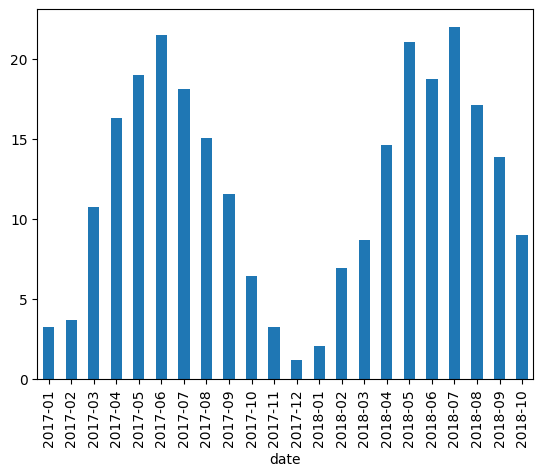

In [64]:
solar.groupby(['date'])['day_power'].mean().plot(kind='bar')